Alumnos:

- Fabian Nova
- Effry Vigorena
- Wilder Prado
- Felipe Guzmán

In [2]:
# Importando librerias
import pandas as pd
import numpy as np
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot  as plt
import seaborn as sns

In [3]:
## Funciones para procesar datos
'''
Funcion que permite cambiar datos de textos
'''
def cambiando_datos_texto(df_, columns_):
        cat_numeric = LabelEncoder()
        return pd.DataFrame(cat_numeric.fit_transform(df_[[columns_]]))
    

In [4]:
dataset  = './lic2020_hackaton.csv'

In [5]:

df_read = pd.read_csv(dataset, encoding='ISO-8859-1', delimiter=',', engine='python')


In [17]:
## Crear una copia del dataframe
df_copy = df_read.copy()

In [10]:
# report_sv = sv.analyze(df_read)
# report_sv.show_html(filepath='reporte_sv.html')

                                             |          | [  0%]   00:00 -> (? left)

Report reporte_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


ATTENTION: default value of option mesa_glthread overridden by environment.
ATTENTION: default value of option mesa_glthread overridden by environment.
ATTENTION: default value of option mesa_glthread overridden by environment.
ATTENTION: default value of option mesa_glthread overridden by environment.
[2023-01-07T12:17:46Z ERROR glean_core::metrics::ping] Invalid reason code startup for ping background-update


In [6]:
#Seleccion rapida de datos
# - Codigo
# - Tipo de Adquisicion
# - Estado,
# - CodigoOrganismo
# - NombreOrganismo
# - FechaPublicacion (? Queda fuera debido a que no tenemos la fecha de adjudicacion para identificar los tiempos de duracion de la licitación)
# - RutProveedor
# - NombreProveedor (? vacios)
# - Moneda de la Oferta
# - MontoLineaAdjudica
# - Ofertaseleccionada

In [7]:
df_read.head(5)

,Codigo,Tipo de Adquisicion,Estado,CodigoOrganismo,NombreOrganismo,RutUnidad,ComunaUnidad,FechaPublicacion,CodigoProductoONU,RutProveedor,NombreProveedor,Moneda de la Oferta,MontoLineaAdjudica,Oferta seleccionada
0,8468777,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1375151,HOSPITAL CLINICO METROPOLITANO LA FLORIDA DRA ...,65.075.485-9,NaN,2020-01-21,51201806,76.432.529-K,CSL Behring SpA Chile,Peso Chileno,0,No Seleccionada
1,8468777,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1375151,HOSPITAL CLINICO METROPOLITANO LA FLORIDA DRA ...,65.075.485-9,NaN,2020-01-21,51201806,96.945.670-2,NOVOFARMA SERVICE - LABORATORIO BAGO,Peso Chileno,0,No Seleccionada
2,8468777,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1375151,HOSPITAL CLINICO METROPOLITANO LA FLORIDA DRA ...,65.075.485-9,NaN,2020-01-21,51201806,96.582.310-7,Grifols Chile S.A.,Peso Chileno,1592000,Seleccionada
3,8468777,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1375151,HOSPITAL CLINICO METROPOLITANO LA FLORIDA DRA ...,65.075.485-9,NaN,2020-01-21,51201806,96.859.930-5,Libra Chile S.A.,Peso Chileno,0,No Seleccionada
4,8468777,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1375151,HOSPITAL CLINICO METROPOLITANO LA FLORIDA DRA ...,65.075.485-9,NaN,2020-01-21,51201806,96.582.310-7,Grifols Chile S.A.,Peso Chileno,19320600,Seleccionada


In [8]:
# 1. Descripción de los datos
    # Identificar tipos -> OK
    # Identificar Nulos -> OK
    # Distribución de los datos -
# Correlación

In [9]:

columnas = df_read.dtypes.reset_index().rename(columns={'index':'columna', 0:'tipo'})
campos_nulos = df_read.columns[df_read.isnull().sum() > 0].to_list()
campos_numericos =columnas[columnas.tipo!='object']['columna'].to_list()
campos_textos = columnas[columnas.tipo=='object']['columna'].to_list()

print("Campos nulos:", campos_nulos)
print("Campos numericos:", campos_numericos)
print("Campos textos:", campos_textos)

Campos nulos: ['ComunaUnidad', 'NombreProveedor']
Campos numericos: ['Codigo', 'CodigoOrganismo', 'CodigoProductoONU']
Campos textos: ['Tipo de Adquisicion', 'Estado', 'NombreOrganismo', 'RutUnidad', 'ComunaUnidad', 'FechaPublicacion', 'RutProveedor', 'NombreProveedor', 'Moneda de la Oferta', 'MontoLineaAdjudica', 'Oferta seleccionada']


In [10]:
# De  los campos numericos
df_read.describe()

,Codigo,CodigoOrganismo,CodigoProductoONU
count,1.882980e+06,1.882980e+06,1.882980e+06
mean,8.695127e+06,1.168506e+05,4.667639e+07
std,3.780515e+04,2.768295e+05,1.704853e+07
min,8.468777e+06,6.918000e+03,1.010150e+07
25%,8.663760e+06,7.321000e+03,4.111312e+07
50%,8.693322e+06,8.656800e+04,4.410310e+07
75%,8.724727e+06,1.150090e+05,5.117190e+07
max,8.886994e+06,1.741046e+06,1.041010e+08


In [11]:
df_read['Tipo de Adquisicion'].unique()

array(['Licitación Pública entre a 2000 y 5000 UTM (LQ)',
       'Licitación Pública Entre 100 y 1000 UTM (LE)',
       'Licitación Pública Mayor 1000 UTM (LP)',
       'Licitación Pública Mayor a 5000 (LR)',
       'Licitación Pública Menor a 100 UTM (L1)',
       'Licitación Pública MOP (O1)',
       'Licitación Pública Servicios personales especializados (LS)',
       'Licitación Privada entre 100 y 1000 UTM.',
       'Licitación Privada Mayor a 1000 UTM',
       'Licitación Privada entre a 2000 y 5000 UTM (H2)',
       'Licitación Privada Menor a 100 UTM.',
       'Licitación Privada Mayor a 5000 (I2)',
       'Licitación Privada MOP (O2)'], dtype=object)

In [12]:
df_read['Estado'].unique()

array(['Adjudicada', 'Desierta (o art. 3 ó 9 Ley 19.886)', 'Cerrada',
       'Revocada', 'Suspendida'], dtype=object)

In [13]:
df_read['Moneda de la Oferta'].unique()

array(['Peso Chileno', 'Moneda revisar', 'Unidad de Fomento', 'Dolar',
       'Euro'], dtype=object)

In [14]:
df_read['Oferta seleccionada'].unique()

array(['No Seleccionada', 'Seleccionada'], dtype=object)

In [18]:
## checkear
# df_read[~df_read['MontoLineaAdjudica'].str.isnumeric()]
df_copy['monto_numeric'] = pd.to_numeric(df_copy['MontoLineaAdjudica'], errors='coerce')
non_numeric_values = df_copy[pd.isnull(df_copy['monto_numeric'])]['monto_numeric']

In [19]:
cat_features = ['Tipo de Adquisicion', 'Estado', 'Moneda de la Oferta', 'Oferta seleccionada']


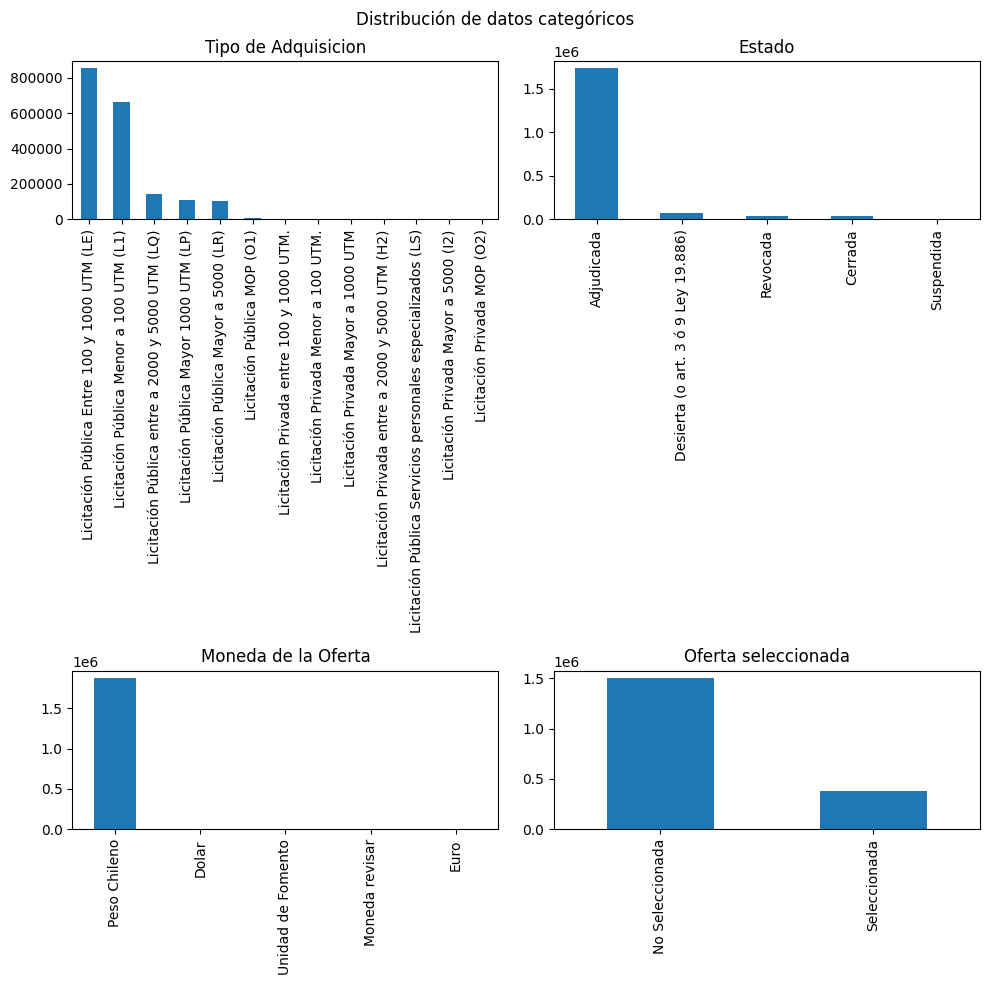

In [21]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
plt.suptitle('Distribución de datos categóricos')
for c,i in enumerate(cat_features):
    if c < 2:       
        df_copy[i].value_counts().plot(kind='bar', ax=axes[0,c]).set_title(i)
    else:
        df_copy[i].value_counts().plot(kind='bar', ax=axes[1,c-2]).set_title(i)
    
    
plt.tight_layout()
plt.show()
    

In [22]:
for i in cat_features:
    df_copy[i]=cambiando_datos_texto(df_=df_copy, columns_=i) 

/home/fguzman/miniconda3/envs/mdd/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fguzman/miniconda3/envs/mdd/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fguzman/miniconda3/envs/mdd/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fguzman/miniconda3/envs/mdd/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-v

In [23]:
df_copy['rut_numeric'] = df_copy['RutProveedor'].map(lambda x: str(x).replace('.',''))
df_copy['rut_numeric'] = df_copy['rut_numeric'].map(lambda x: str(x).replace('-',''))
df_copy['rut_numeric'] = df_copy['rut_numeric'].map(lambda x: str(x).replace('k','0'))
df_copy['rut_numeric'] = df_copy['rut_numeric'].map(lambda x: str(x).replace('K','0'))
df_copy['rut_numeric'] = df_copy['rut_numeric'].map(lambda x: str(x).replace('FR',''))
df_copy['rut_numeric'] = df_copy['rut_numeric'].map(lambda x: str(x).replace('A',''))
df_copy['rut_numeric'] = df_copy['rut_numeric'].map(lambda x: str(x).replace('B',''))
df_copy['rut_numeric'] = df_copy['rut_numeric'].map(lambda x: str(x).replace(' ',''))
df_copy['rut_numeric'] = df_copy['rut_numeric'].map(lambda x: str(x).replace('SINDT','0'))
df_copy['rut_numeric'] = df_copy['rut_numeric'].map(lambda x: str(x).replace('ES',''))
df_copy[~df_copy['rut_numeric'].str.isnumeric()]
df_copy['rut_numeric'] = df_copy['rut_numeric'].astype('int')


In [24]:
df_copy.corr()

,Codigo,Tipo de Adquisicion,Estado,CodigoOrganismo,CodigoProductoONU,Moneda de la Oferta,Oferta seleccionada,monto_numeric,rut_numeric
Codigo,1.000000,-0.025301,-0.002609,0.002972,0.022062,-0.015748,-0.001475,0.000682,0.028195
Tipo de Adquisicion,-0.025301,1.000000,0.014196,-0.014372,-0.037465,0.000604,0.010862,0.000233,-0.010150
Estado,-0.002609,0.014196,1.000000,-0.007591,0.019904,-0.006641,-0.133981,-0.000224,-0.022225
CodigoOrganismo,0.002972,-0.014372,-0.007591,1.000000,0.026040,0.006680,0.007843,-0.000085,0.008462
CodigoProductoONU,0.022062,-0.037465,0.019904,0.026040,1.000000,0.030431,0.038867,0.001456,-0.031864
Moneda de la Oferta,-0.015748,0.000604,-0.006641,0.006680,0.030431,1.000000,-0.004511,0.000036,-0.012808
Oferta seleccionada,-0.001475,0.010862,-0.133981,0.007843,0.038867,-0.004511,1.000000,0.001680,-0.010406
monto_numeric,0.000682,0.000233,-0.000224,-0.000085,0.001456,0.000036,0.001680,1.000000,0.000143
rut_numeric,0.028195,-0.010150,-0.022225,0.008462,-0.031864,-0.012808,-0.010406,0.000143,1.000000


/tmp/ipykernel_36881/22769716.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_copy.corr(), dtype=np.bool))


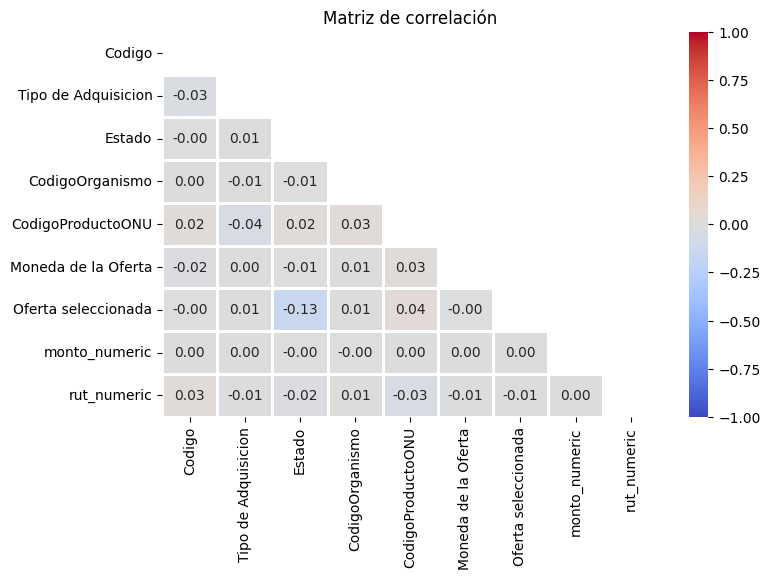

In [25]:
## Matriz de correlacion 
plt.figure(figsize = (8,5))
plt.title('Matriz de correlación')

mask = np.triu(np.ones_like(df_copy.corr(), dtype=np.bool))
sns.heatmap(df_copy.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="coolwarm") 
plt.show()


In [151]:
df_copy.dtypes[df_copy.dtypes=='int64'].index.to_list()

['Codigo',
 'Tipo de Adquisicion',
 'Estado',
 'CodigoOrganismo',
 'CodigoProductoONU',
 'Moneda de la Oferta',
 'Oferta seleccionada',
 'rut_numeric']

/home/fguzman/miniconda3/envs/mdd/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


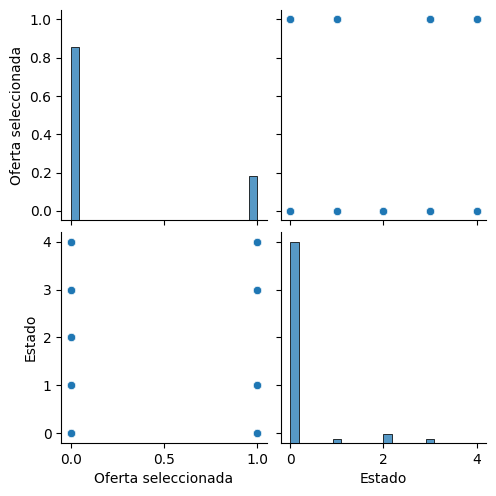

In [34]:
# Se revisa cual es la distribución de las variables numéricas
# sns.set()
cols =['Oferta seleccionada','Estado']
sns.pairplot(df_copy[cols], size = 2.5)

# plt.show()

## Resumen de Analisis exploratorio

- Se observa que los datos solo existen dos campos cuyo valor son nulos (ComunaUnidad, NombreProveedor)
- Existen 3 columnas numericas (Codigo, CodigoOrganismo, CodigoProductoOnu)
- Existen 11 columnas de tipo texto ('Tipo de Adquisicion', 'Estado', 'NombreOrganismo', 'RutUnidad', 'ComunaUnidad', 'FechaPublicacion', 'RutProveedor', 'NombreProveedor', 'Moneda de la Oferta', 'MontoLineaAdjudica', 'Oferta seleccionada')
- los datos de texto más relevantes para el analisis son:
  - ['Tipo de Adquisicion', 'Estado', 'Moneda de la Oferta', 'Oferta seleccionada', 'RutProveedor]
- Se aplican conversiones (encoder) para los datos de texto relevantes para identificar si existe correlacion
- No se aprecia una correlación entre los datos (correlación baja)
- Al comparar la distribución de los datos entre las variables de estado y oferta seleccionada no se aprecia ningun tipo de distribución

## Hipotesis
  ### La cantidad de oferentes que se presentan en unitario a una licitación representan una caracteristica que puede ser un patrón potencial de corrupción 

In [42]:
df_copy = df_read.copy()

In [43]:
# Agrupamos las licitaciones por codigo de licitacion y contamos los oferentes que se participaron
df_empresas_x_licitacion = df_copy[['Codigo','RutProveedor']].groupby(by=['Codigo']).size().reset_index().rename(columns={0:'Cantidad_oferentes'})

In [44]:
df_empresas_x_licitacion.sort_values(by='Cantidad_oferentes', ascending=False)

,Codigo,Cantidad_oferentes
1920,8636096,4792
59412,8715117,3012
746,8632917,2780
8837,8646101,2499
18699,8659604,2401
...,...,...
5703,8641679,1
58340,8713692,1
14788,8654339,1
58355,8713710,1


In [45]:
## Seleccionamos las licitaciones en donde solo participa 1 oferente
datos_a_ocupar = df_empresas_x_licitacion[df_empresas_x_licitacion.Cantidad_oferentes==1]
codigos_licitaciones = datos_a_ocupar.Codigo.to_list()

In [46]:
df_solo_1_empresa = df_copy[df_copy.Codigo.isin(codigos_licitaciones)]

In [47]:
df_solo_1_empresa

,Codigo,Tipo de Adquisicion,Estado,CodigoOrganismo,NombreOrganismo,RutUnidad,ComunaUnidad,FechaPublicacion,CodigoProductoONU,RutProveedor,NombreProveedor,Moneda de la Oferta,MontoLineaAdjudica,Oferta seleccionada
39,8531486,Licitación Pública Mayor 1000 UTM (LP),Adjudicada,7045,SERVICIO DE SALUD NORTE HOSPITAL ROBERTO DEL RIO,61.608.004-0,Independencia,2020-01-14,42295303,76.018.213-3,ADVANCED MEDICAL PRODUCTS SPA,Peso Chileno,110000,Seleccionada
1111,8578778,Licitación Pública Mayor a 5000 (LR),Adjudicada,7474,Instituto de Neurocirugía,61.608.407-0,Providencia,2020-01-02,72131702,11.844.310-1,PAMELA NATHALIE ROJAS DONOSO,Peso Chileno,400674996,Seleccionada
1190,8590377,Licitación Pública Mayor 1000 UTM (LP),Adjudicada,1667479,SERVICIO DE SALUD ARICA HOSP DR JUAN NOE CREVANI,61.606.001-5,Santiago,2020-01-27,73152101,76.885.254-5,Milca Sarai,Peso Chileno,55507680,Seleccionada
1195,8593093,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1667479,SERVICIO DE SALUD ARICA HOSP DR JUAN NOE CREVANI,61.606.001-5,Arica,2020-01-27,51142941,77.478.120-k,Fresenius Kabi Chile Ltda.,Peso Chileno,79128000,Seleccionada
1267,8595840,Licitación Pública Entre 100 y 1000 UTM (LE),Desierta (o art. 3 ó 9 Ley 19.886),87187,I MUNICIPALIDAD DE LOS ANGELES,69.170.101-8,Los Angeles,2020-01-17,72101603,76.723.997-1,Maxi Ingenieria Construcción,Peso Chileno,0,No Seleccionada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876637,8730978,Licitación Pública Menor a 100 UTM (L1),Adjudicada,7436,SERVICIO DE SALUD HOSPITAL DE PICHILEMU,61.602.153-2,Santiago,2020-09-30,30201902,76.098.322-5,VitroScience LTDA,Peso Chileno,812040,Seleccionada
1876638,8730981,Licitación Pública Menor a 100 UTM (L1),Desierta (o art. 3 ó 9 Ley 19.886),7436,SERVICIO DE SALUD HOSPITAL DE PICHILEMU,61.602.153-2,Santiago,2020-09-30,30201902,79.568.850-1,VALTEK S.A.,Peso Chileno,0,No Seleccionada
1876682,8730986,Licitación Pública Menor a 100 UTM (L1),Adjudicada,98443,I MUNICIPALIDAD DE TOME,69.150.100-0,Tomé,2020-09-30,11111611,76.722.635-7,MOSIL LIMITADA,Peso Chileno,797643,Seleccionada
1876683,8730987,Licitación Pública Menor a 100 UTM (L1),Adjudicada,7436,SERVICIO DE SALUD HOSPITAL DE PICHILEMU,61.602.153-2,Santiago,2020-09-30,72101607,13.636.560-6,LARRY ENZO,Peso Chileno,1800000,Seleccionada


In [80]:
# report_sv = sv.analyze(df_solo_1_empresa)
# report_sv.show_html(filepath='reporte_solo1_empresa.html')

                                             |          | [  0%]   00:00 -> (? left)

Report reporte_solo1_empresa.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


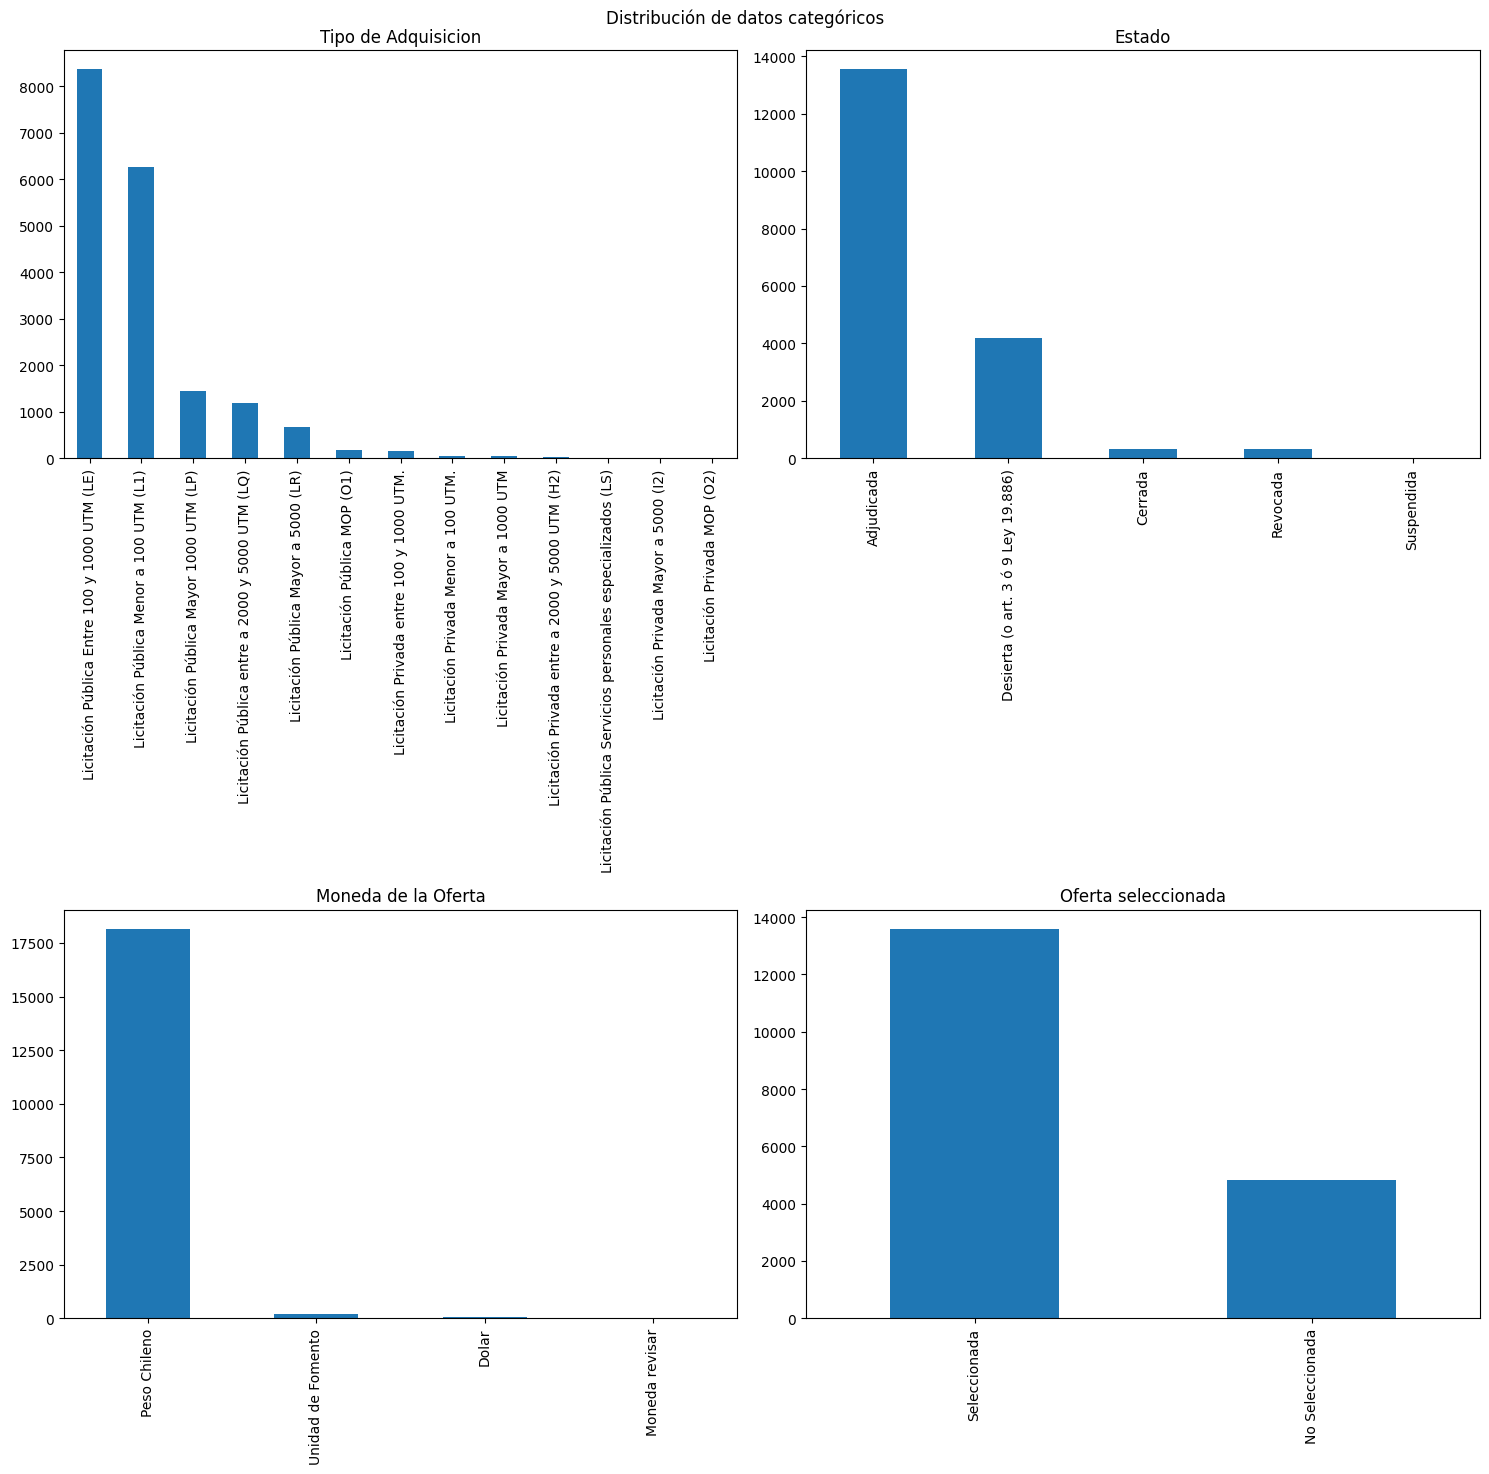

In [51]:
fig, axes = plt.subplots(2,2, figsize=(15,15))
plt.suptitle('Distribución de datos categóricos')
for c,i in enumerate(cat_features):
    if c < 2:       
        df_solo_1_empresa[i].value_counts().plot(kind='bar', ax=axes[0,c]).set_title(i)
    else:
        df_solo_1_empresa[i].value_counts().plot(kind='bar', ax=axes[1,c-2]).set_title(i)
    
    
plt.tight_layout()
plt.show()
    